Questão 1

Matriz de massa (M):
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Matriz de constantes elásticas (K):
[[ 2. -1.  0.  0. -1.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [-1.  0.  0. -1.  2.]]
Matriz dinâmica (D):
[[ 2. -1.  0.  0. -1.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [-1.  0.  0. -1.  2.]]
Frequências de oscilação (rad/s):
Modo 1: 1.9021
Modo 2: 1.1756
Modo 3: 0.0000
Modo 4: 1.9021
Modo 5: 1.1756


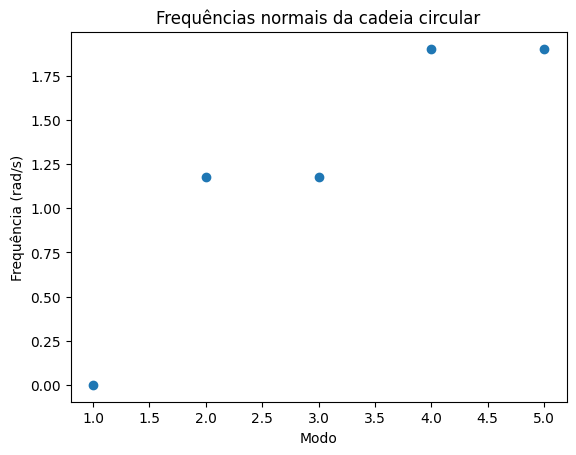

In [20]:
import numpy as np
import matplotlib.pyplot as plt

k = 1.0 # Constante elástica (N/m)
m = 1.0 # Massa (kg)

N = int(input("Insira o número de partículas:"))

# Caso 1 - Massas homogêneas


# Matriz de massa
M = np.eye(N) * m  # Massa homogênea para todas as partículas
print("Matriz de massa (M):")
print(M)

K = np.zeros((N, N))
for i in range(N):
    K[i, i] = 2 * k
    K[i, (i-1) % N] = -k
    K[i, (i+1) % N] = -k

print("Matriz de constantes elásticas (K):")
print(K)

# Matriz dinâmica (D = M^{-1} K)
D = np.linalg.inv(M) @ K  # ou, como M = m*I, D = K/m
# Alternativamente, mais eficiente:
# D = K / m

print("Matriz dinâmica (D):")
print(D)

# Cálculo dos autovalores (valores próprios) da matriz dinâmica
autovalores = np.linalg.eigvals(D)

# Frequências (apenas parte real e positiva)
frequencias = np.sqrt(np.abs(autovalores))

print("Frequências de oscilação (rad/s):")
for i, f in enumerate(frequencias):
    print(f"Modo {i+1}: {f:.4f}")

# Opcional: plotar as frequências
plt.scatter(range(1, N+1), np.sort(frequencias.real))
plt.xlabel('Modo')
plt.ylabel('Frequência (rad/s)')
plt.title('Frequências normais da cadeia circular')
plt.show()